In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline


In [127]:
#importing the data set
df = pd.read_csv("spambase.data")
df.head()
df.shape

(4600, 58)

In [128]:
with open('./spambase.names') as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
data_set= pd.read_csv('./spambase.data', header=None, names=labels +['spam'])
# spam = spamData.pop('spam')

In [129]:
# checking null values
data_set.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [130]:
# droping duplicate values
new_data = data_set.drop_duplicates()
new_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


<Figure size 10000x5000 with 0 Axes>

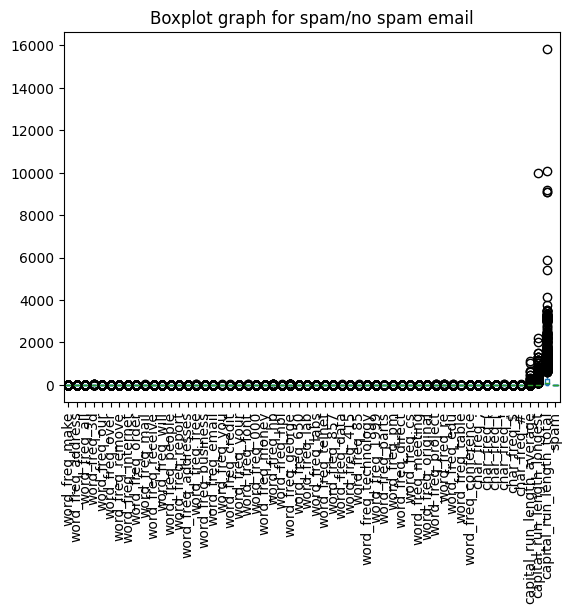

In [131]:
#check the data set for outliers
figure = plt.figure(figsize=(100,50))
new_data.plot.box(title="Boxplot graph for spam/no spam email", rot=90)
plt.show()

<Axes: xlabel='capital_run_length_total'>

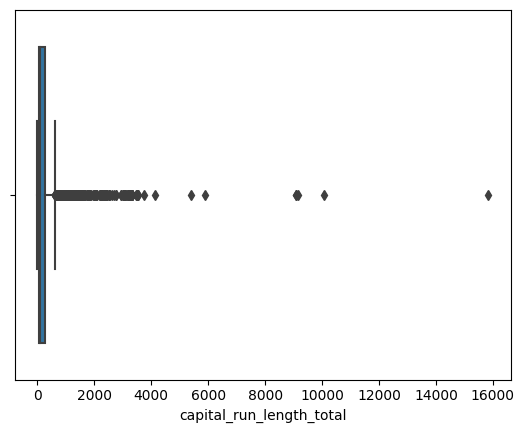

In [132]:
sns.boxplot(x=new_data['capital_run_length_total'])

<Axes: xlabel='capital_run_length_average'>

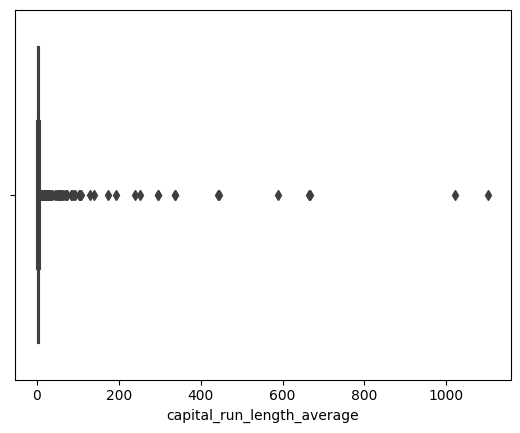

In [133]:
sns.boxplot(x=new_data['capital_run_length_average'])

<Axes: xlabel='capital_run_length_longest'>

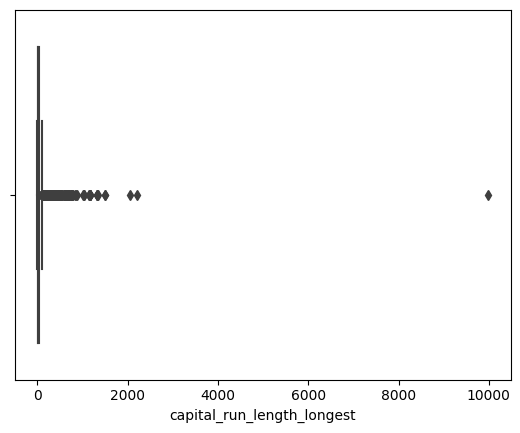

In [134]:
sns.boxplot(x=new_data['capital_run_length_longest'])

In [135]:
#Using IQR method setting the outliers as null values
for outlier in ["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]:
    quart75, quart25 = np.percentile(new_data.loc[:,outlier], [75,25])
    IQR = quart75 - quart25
    max = quart75 + (1.5 * IQR)
    min = quart25 - (1.5 * IQR)
    new_data.loc[new_data[outlier] < min, outlier] = np.nan
    new_data.loc[new_data[outlier] > max, outlier] = np.nan 

<Axes: xlabel='capital_run_length_total'>

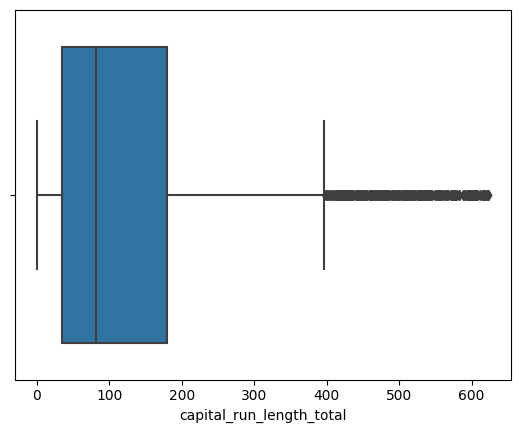

In [136]:
sns.boxplot(x=new_data['capital_run_length_total'])

<Axes: xlabel='capital_run_length_average'>

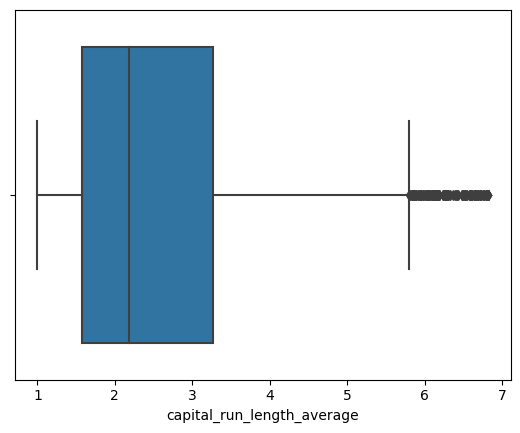

In [137]:
sns.boxplot(x=new_data['capital_run_length_average'])

<Axes: xlabel='capital_run_length_longest'>

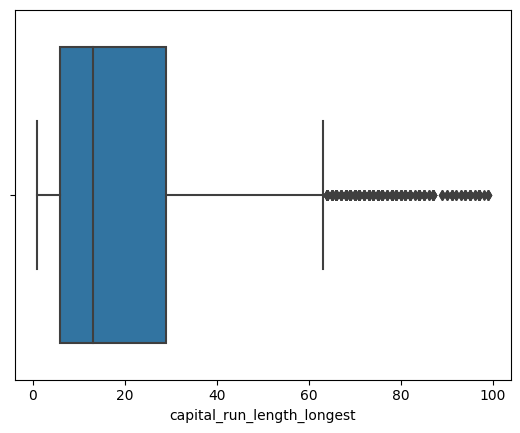

In [138]:
sns.boxplot(x=new_data['capital_run_length_longest'])

<Figure size 10000x5000 with 0 Axes>

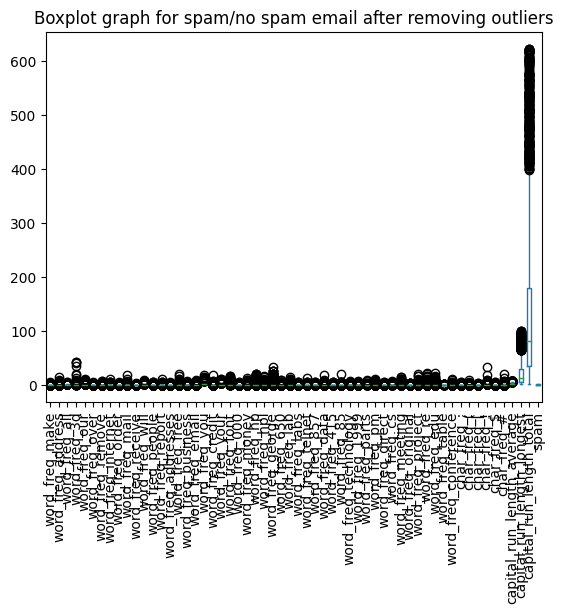

In [139]:
figure = plt.figure(figsize=(100,50))
new_data.plot.box(title="Boxplot graph for spam/no spam email after removing outliers", rot=90)
plt.show()

In [140]:
#Drop null values in the dataset
new_data = new_data.dropna()
new_data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.0,3.756,61.0,278.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.0,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.0,3.537,40.0,191.0,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.0,3.000,15.0,54.0,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.0,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.0,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.0,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.0,1.147,5.0,78.0,0


In [141]:
# droping columns which have zeros as values
x1 = new_data.drop(labels=['word_freq_3d','char_freq_['], axis=1)
x1.shape

(3446, 56)

In [142]:
# dividing x and y 
X = x1
Y = x1.iloc[:, 55].values
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
# The goal of applying feature scaling is to make sure features are on almost the same scale so that each feature is equally important and make it easier to process by most machine-learning algorithms.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
scaled_X
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


array([[-0.30598134,  1.15324516,  0.70190917, ...,  2.26509782,
         1.20588278,  1.44396996],
       [-0.30598134, -0.19537304, -0.50585739, ...,  1.14500879,
         0.53855516,  1.44396996],
       [-0.30598134, -0.19537304, -0.50585739, ...,  1.14500879,
         0.53855516,  1.44396996],
       ...,
       [ 0.66252394, -0.19537304,  0.06028318, ..., -0.66846869,
        -0.02138639, -0.69253518],
       [ 2.79323557, -0.19537304, -0.50585739, ..., -0.72180626,
        -0.32820369, -0.69253518],
       [-0.30598134, -0.19537304,  0.72078052, ..., -0.72180626,
        -0.61968011, -0.69253518]])

In [144]:
df1 = pd.DataFrame(data=scaled_X , columns=X.columns)
df1

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,-0.305981,1.153245,0.701909,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,-0.253196,...,-0.1174,-0.155346,-0.603441,0.685993,-0.266006,-0.07316,1.198328,2.265098,1.205883,1.443970
1,-0.305981,-0.195373,-0.505857,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,1.531085,...,-0.1174,-0.155346,-0.042229,-0.121477,-0.266006,-0.07316,1.009960,1.145009,0.538555,1.443970
2,-0.305981,-0.195373,-0.505857,0.458542,-0.303297,0.607644,1.270253,1.177436,0.738324,1.531085,...,-0.1174,-0.155346,-0.050422,-0.123996,-0.266006,-0.07316,1.009960,1.145009,0.538555,1.443970
3,-0.305981,-0.195373,-0.505857,2.196817,-0.303297,-0.263181,4.173219,-0.214868,-0.346011,-0.253196,...,-0.1174,-0.155346,0.310064,-0.294056,-0.266006,-0.07316,0.548074,-0.188431,-0.512294,1.443970
4,-0.305981,-0.195373,-0.505857,2.296554,-0.303297,-0.263181,-0.228820,-0.214868,0.755535,5.272320,...,-0.1174,-0.155346,-0.382233,-0.087465,0.012040,-0.07316,-0.595032,-0.775144,-0.067409,1.443970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0.694807,-0.195373,0.664166,-0.439092,0.799382,-0.263181,-0.228820,-0.214868,-0.346011,-0.253196,...,-0.1174,-0.155346,0.346932,-0.294056,-0.266006,-0.07316,-1.050038,-0.828481,-0.251499,-0.692535
3442,-0.305981,-0.195373,-0.505857,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,-0.253196,...,-0.1174,-0.155346,-0.603441,0.150619,-0.266006,-0.07316,-0.694806,-0.775144,-0.819111,-0.692535
3443,0.662524,-0.195373,0.060283,-0.439092,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,-0.253196,...,-0.1174,0.319285,2.337799,-0.294056,-0.266006,-0.07316,-0.824685,-0.668469,-0.021386,-0.692535
3444,2.793236,-0.195373,-0.505857,0.016849,-0.303297,-0.263181,-0.228820,-0.214868,-0.346011,-0.253196,...,-0.1174,-0.155346,-0.369944,-0.294056,-0.266006,-0.07316,-1.045737,-0.721806,-0.328204,-0.692535


Before performing pca

In [145]:
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_no_pca, X_test_no_pca, y_train_no_pca, y_test_no_pca = train_test_split(df1, Y, test_size = 0.25, random_state = 42)

In [146]:
# knn without doing pca
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_no_pca,y_train_no_pca)

KNeighborsClassifier()

In [147]:
# accuracy of test data
classifier.score(X_test_no_pca, y_test_no_pca)

0.9721577726218097

In [148]:
# Predicting the Test set results
y_pred_no_pca = classifier.predict(X_test_no_pca)

              Spam (1)  Not spam (0)
Spam (1)           536            13
Not spam (0)        11           302


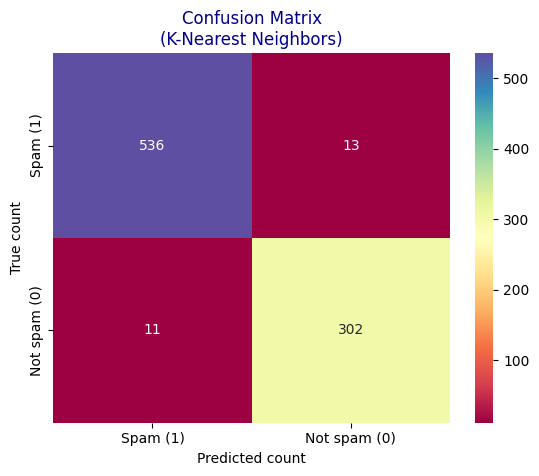

In [149]:
#Plot confusionn matrix for KNN
matrix = pd.DataFrame((metrics.confusion_matrix(y_test_no_pca, y_pred_no_pca)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for knn
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [150]:
#Classification report for KNN
classificationReport = classification_report(y_test_no_pca, y_pred_no_pca)
print("Classification Report: \n", classificationReport)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       549
           1       0.96      0.96      0.96       313

    accuracy                           0.97       862
   macro avg       0.97      0.97      0.97       862
weighted avg       0.97      0.97      0.97       862



In [151]:
# performing decision tree without doing pca
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtree.fit(X_train_no_pca,y_train_no_pca)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [152]:
dtree.score(X_test_no_pca, y_test_no_pca)

1.0

In [153]:
predictions_no_pca= dtree.predict(X_test_no_pca)

              Spam (1)  Not spam (0)
Spam (1)           549             0
Not spam (0)         0           313


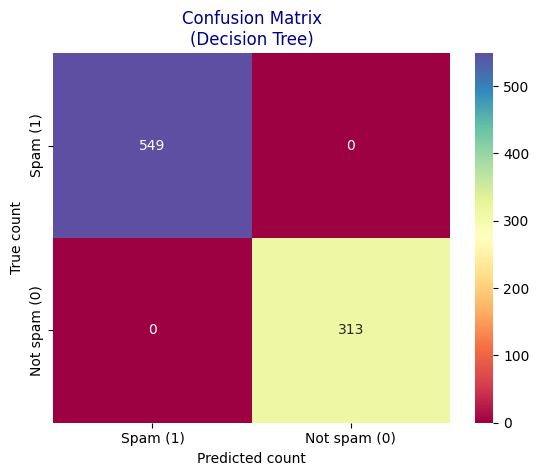

In [154]:
#Plot confusionn matrix for DT
matrix = pd.DataFrame((metrics.confusion_matrix(y_test_no_pca, predictions_no_pca)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for DT
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(Decision Tree)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [155]:
#Classification report for DT
classificationReport = classification_report(y_test_no_pca, predictions_no_pca)
print("Classification Report:\n", classificationReport)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       313

    accuracy                           1.00       862
   macro avg       1.00      1.00      1.00       862
weighted avg       1.00      1.00      1.00       862



After performing PCA

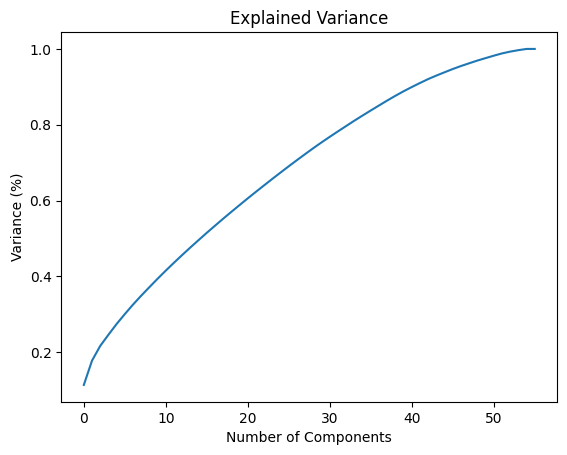

In [156]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(df1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [157]:
pca = PCA(0.95)
X_pca = pca.fit_transform(df1)

In [158]:
X_pca.shape

(3446, 47)

In [159]:
principleComponents = pd.DataFrame(data =X_pca)

In [160]:
# # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principleComponents, Y, test_size = 0.25, random_state = 42)

In [161]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [162]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

              Spam (1)  Not spam (0)
Spam (1)           529            20
Not spam (0)        29           284


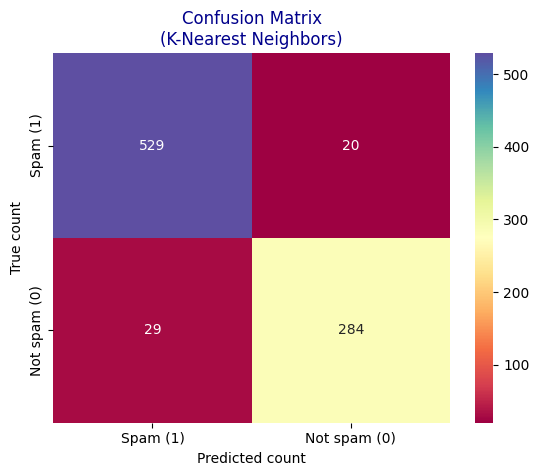

In [163]:
#Plot confusionn matrix for KNN
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_pred)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for knn
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(K-Nearest Neighbors)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [164]:
# accuracy of test data
classifier.score(X_test, y_test)

0.9431554524361949

In [165]:
# accuracy of training data
predict_train = classifier.predict(X_train)
accuracy_score(y_train,predict_train)

0.9713622291021672

In [166]:
#Classification report for KNN
classificationReport = classification_report(y_test, y_pred)
print("Classification Report: \n", classificationReport)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       549
           1       0.93      0.91      0.92       313

    accuracy                           0.94       862
   macro avg       0.94      0.94      0.94       862
weighted avg       0.94      0.94      0.94       862



In [167]:
# performing decision tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [168]:
predictions= dtree.predict(X_test)

              Spam (1)  Not spam (0)
Spam (1)           516            33
Not spam (0)        44           269


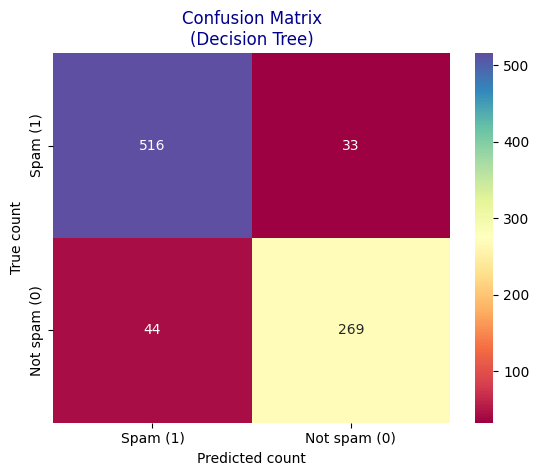

In [169]:
#Plot confusionn matrix for DT
matrix = pd.DataFrame((metrics.confusion_matrix(y_test, predictions)), ('Spam (1)', 'Not spam (0)'), ('Spam (1)', 'Not spam (0)'))
print(matrix)

#Plot confusion matrix in a graph for DT
heatmap = sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Spectral')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())

plt.title('Confusion Matrix\n(Decision Tree)', color = 'darkblue')
plt.ylabel('True count')
plt.xlabel('Predicted count')
plt.show()

In [170]:
#Classification report for DT
classificationReport = classification_report(y_test, predictions)
print("Classification Report:\n", classificationReport)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       549
           1       0.89      0.86      0.87       313

    accuracy                           0.91       862
   macro avg       0.91      0.90      0.90       862
weighted avg       0.91      0.91      0.91       862



In [171]:
# accuracy of test data
dtree.score(X_test, y_test)

0.9106728538283063

In [172]:
# accuracy of training data
predict_train = dtree.predict(X_train)
accuracy_score(y_train,predict_train)

0.9535603715170279